# Методы классификации данных

## 1. Загрузка и анализ данных

В качестве набора данных я взял House Sales in King County, USA которая содержит информацию о сделках купли-продажи недвижимого имущества с мая 2014 до мая 2015 в Америке. Датасет изначально не содержит пропусков.
    
Ссылка на датасет: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
from collections import defaultdict

Загружаем набор данных:

In [2]:
# набор данных расположен в корневой директории ноутбука
df = pd.read_csv('housesales.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Транспонируем DataFrame для отображения информации по признакам:

In [3]:
df.head().T 

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


Вывод информации о наборе данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

*Площадь указана в квадратных фунтах (Американская система)*

__id__ -- уникальный идентификатор объекта

__date__ -- дата совершения сделки купли-продажи

__price__ -- стоимость недвижимого имущества ($, USD)

__bedrooms__ -- количество спальных комнат

__bathrooms__ -- количество ванных комнат

__sqft_living__ -- жилая площадь дома

__sqft_lot__ -- общая площадь дома

__floors__ -- количество этажей в доме

__waterfront__ -- признак, указывающий, находится ли дом на набережной (1 - да, 0 - нет)

__view__ -- признак указывающий, есть ли вид из дома (0 - нет, 1 - есть, 2 - хороший вид)

__condition__ -- состояние дома (оценка от 1 до 5)

__grade__ -- оценка качества дома, которая зависит от таких факторов, как материалы, планировка, дизайн и т.д. (оценка от 1 до 13)

__sqft_above__ -- площадь всех этажей, которые находятся над землей

__sqft_basement__ -- площадь подвала

__yr_built__ -- год постройки дома

__yr_renovated__ -- год последней реконструкции дома (если нет, то значение равно 0)

__zipcode__ -- почтовый индекс (регион)

__lat__ -- географическая широта

__long__ -- географическая долгота

__sqft_living15__ -- Средняя площадь жилых помещений в доме для соседей в радиусе 15-ти ближайших домов

__sqft_lot15__ — Средняя площадь земельных участков для соседей в радиусе 15-ти ближайших домов

Теперь после анализа признаков необходимо визуализировать распределение признаков по значениям:

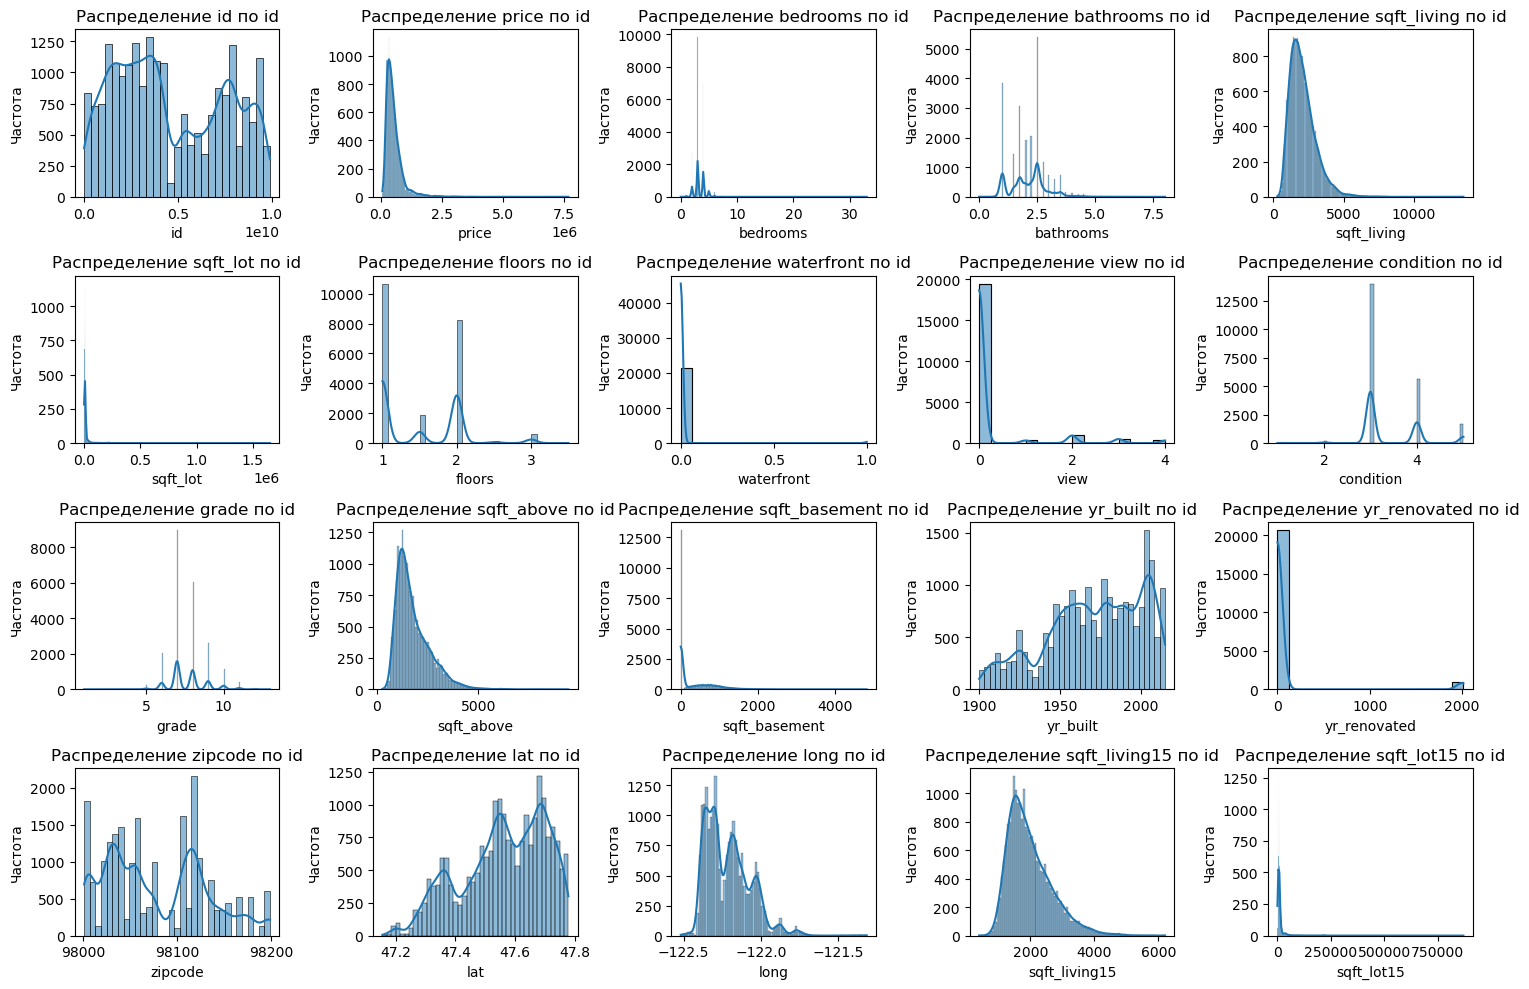

In [5]:
# Отбираем только числовые признаки
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Настройка размера графика
plt.figure(figsize=(15, 10))

# Количество графиков по числовым признакам
num_plots = len(numerical_columns)

# Строим графики для каждого числового признака
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)  # Размещение графиков в 4 строки и 5 столбца
    sns.histplot(df[column], kde=True)  # Можно заменить на boxplot или другие типы графиков
    plt.title(f'Распределение {column} по id')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()  # Для компактного расположения графиков
plt.show()

## 2. Предварительная обработка данных

1. Работа с пропусками (среднее, мода, удаление).
2. Нормализация (MinMaxScaler, StandardScaler).
3. Кодирование категориальных признаков (One-Hot Encoding, Label Encoding).

Работа с пропусками не требуется, так как рассмативаемый набор данных не содержит пропусков:

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Перед нормализацией следует выполнить численное кодирование категориальных признаков. Список категориальных признаков:

In [7]:
list(df.dtypes[df.dtypes == 'object'].index)

['date']

Перед кодированием необходимо просмотреть содержимое этого признака для выбора оптимального метода кодирования:

In [8]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

Как видно из вывода хоть и признак date является номинальным каждый элемент является уникальной датой совершения сделки купли-продажи. Поэтому стандартные методы кодирования вроде One-Hot Encoding или Label Encoding здесь не подходят. Вместо этого я решил разбить дату на три части: день, месяц, и год. А затем добавить эти значения в 3 новых столбца.

Для начала преобразуем строковое представление даты в формат datetime:

In [9]:
# Преобразуем 'date' в формат datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [10]:
# теперь можно создать новые столбцы и заполнить их
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# удаление ненужного столбца
df = df.drop(columns=['date']) 

# вывод результатов
df[['year', 'month', 'day']].head()

,year,month,day
0,2014,10,13
1,2014,12,9
2,2015,2,25
3,2014,12,9
4,2015,2,18


Теперь можно выполнять номализацию данных:

In [11]:
# функция для Min-Max нормализации:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# применяем нормализацию ко всем числовым столбцам
df_n = df.copy() 
df_n = df_n.astype(float)  # преобразуем все столбцы в float для корректной нормализации
for col in df.columns:
    df_n[col] = min_max_scaling(df[col])

df_n

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,...,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.0,0.818182,0.400000
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,...,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.0,1.000000,0.266667
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,...,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,1.0,0.090909,0.800000
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,...,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.0,1.000000,0.266667
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,...,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1.0,0.090909,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,...,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,0.0,0.363636,0.666667
21609,0.666639,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,...,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,1.0,0.090909,0.733333
21610,0.153783,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,...,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,0.0,0.454545,0.733333
21611,0.029327,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,...,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,1.0,0.000000,0.500000


Классификацию недвижимого имущества я буду проводить по цене дома, то есть по признаку price. Для начала необходимо выполнить ручную кластеризацию для признака price. 

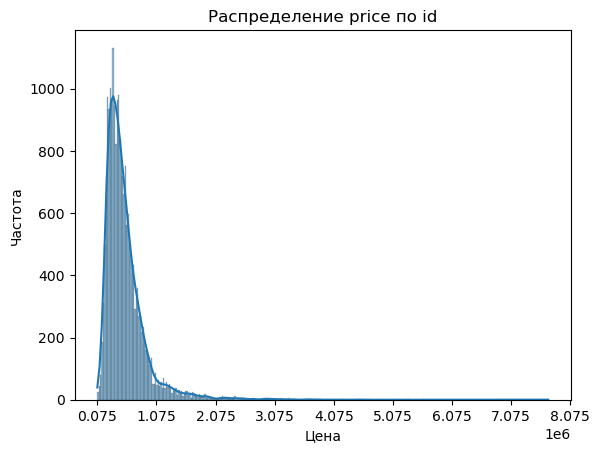

In [12]:
sns.histplot(df.sort_values(by = 'price')['price'].astype(int), kde = True)
plt.title(f'Распределение {'price'} по id')
plt.xlabel('Цена')
plt.ylabel('Частота')
price_min = df['price'].astype(int).min()
price_max = df['price'].astype(int).max()
plt.xticks(range(int(price_min), int(price_max) + 1000000, 1000000))
plt.show()

In [13]:
min(df['price']), max(df['price'])

(75000.0, 7700000.0)

Несмотря на такой большой разброс в цене как видно из гистограммы большая часть домов находятся в пределах от $75,000$ до $2,075,000$. Я решил разделить дома на 3 категории:

1. Не самые дорогие: до $750,000$
2. Дорогие: от $750,000$ до $1,500,000$
3. Очень дорогие: выше $1,500,000$

In [14]:
# Определяем границы классов и метки
bins = [0, 750000, 1500000, float('inf')]  # Границы классов
labels = [1, 2, 3]                        # значения классов  

# Заменяем цены на категории
df['price'] = pd.cut(df['price'], bins=bins, labels=labels)
df['price'] = df['price'].astype(int)
df_n['price'] = df['price'].values

df_n['price']

0        1
1        1
2        1
3        1
4        1
        ..
21608    1
21609    1
21610    1
21611    1
21612    1
Name: price, Length: 21613, dtype: int32

Теперь можно узнать по каким диапазонам были разделены данные:

In [15]:
# для разделения набора данных 
from sklearn.model_selection import train_test_split 

# разделение данных на обучающую и тестово-валидационыый набор
df_train, df_test_and_valid = train_test_split(df_n, test_size=0.4, random_state=1)
len(df_train), len(df_test_and_valid)

(12967, 8646)

In [16]:
# разделение на тестовый и валидационные наборы
df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=11)
len(df_test), len(df_val)

(4323, 4323)

Сбрасываем старые индексы и присваиваем новые для разделенных наборов данных:

In [17]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop=True)

Теперь необходимо удалить из обучающей и тестовой выборки столбец с целевыми признаками и сохранить их в отдельные целевые столбцы:

In [18]:
y_train = df_train['price'].values
y_test = df_test['price'].values
y_val = df_val['price'].values

del df_train['price']
del df_val['price']
del df_test['price']

## 4. Анализ корреляции признаков

Пропорциональное распределение ценовых категорий:

In [19]:
df['price'].value_counts(normalize=True)

price
1    0.834313
2    0.141813
3    0.023875
Name: proportion, dtype: float64

Общий анализ корреляции по всем данным. Корреляционная матрица:

In [20]:
# для вычисления коэффициента корреляции используется формула Пирсона:
correlation_matrix = df.corr()
correlation_matrix.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
id,1.000000,-0.035611,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708,0.001939
price,-0.035611,1.000000,0.268689,0.441673,0.615675,0.087320,0.212676,0.202719,0.357640,0.030987,...,0.044496,0.125753,-0.064977,0.180547,0.017717,0.537471,0.077311,0.000410,-0.010009,-0.001989
bedrooms,0.001286,0.268689,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533,-0.008031
bathrooms,0.005160,0.441673,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392,-0.005304
sqft_living,-0.012258,0.615675,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,-0.007246


Выводим визуализацию матрицы корреляции:

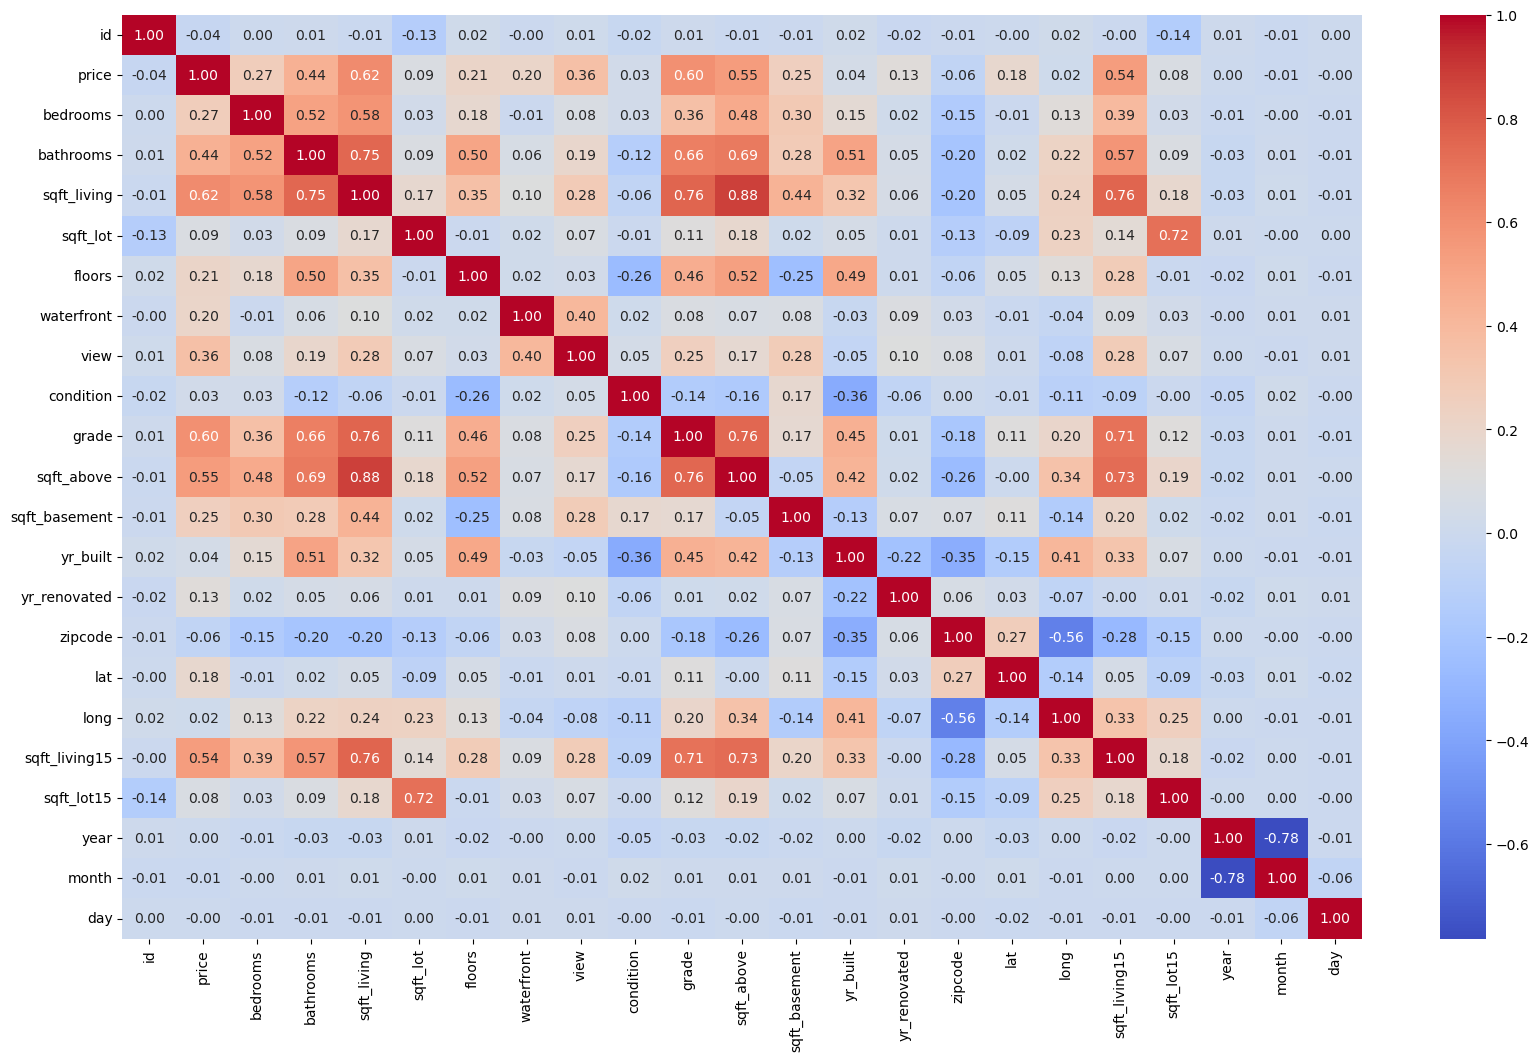

In [21]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.show()

## 5. Метод взвешенных k-ближайших соседей

В качестве метрики для расчёта расстояния между объектами обучающей выборки я буду использовать метрику Евклида:

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

In [22]:
# функция вычисляет метрику евклида для двух объектов:
def euclidean_metric(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

Для реализации взвешенного варианта knn я буду использовать метод окна Перзона. 

$$w(i, x) = [i \le k]w_i,$$
где $w_i$ - вес, зависящий только от номера соседа;

$w(i, x) = K(\frac{\rho(x, x^{(i)})}h)$, где $h$ - ширина окна, $K(r)$ - ядро, не возрастает и положительно на $[0, 1]$.

**Метод парзеновского окна фиксированной ширины:**
$$a(x; S, h, K) = \arg\max_{y \in Y} \sum\limits_{i=1}^{n}[y_i = y]K(\frac{\rho(x, x_i)}{\color{red}{h}}).$$

**Метод парзеновского окна переменной ширины:**
$$a(x; S, h, K) = \arg\max_{y \in Y} \sum\limits_{i=1}^{n}[y_i = y]K(\frac{\rho(x, x_i)}{\color{red}{\rho(x, x^{(k+1)}}}).$$

**Оптимизация параметров:**
* выбор ширины окна $h$ или числа соседей $k$;
* выбор ядра $K$.

В своей модели я буду использовать метод Парзеновского окна фиксированной ширины. Выбор ширины окна, числа соседей и функции ядра будет произведен на этапе валидации или тестирования.     

Модель реализована в виде класса так как в процессе работы потребуются несколько методов для работы с моделью.

In [23]:
class MyKNN:
    # реализация взвешенного knn:
    # k - число соседей
    # h - ширина окна в функции ядра
    # kernel - используемая функция ядра
    # metric - используемая функция метрики
    def __init__(self, k=3, h=1.0, kernel=None, metric=None):
        self.k = k
        self.h = h
        self.kernel = kernel
        self.metric = metric 

    # сеттер для установки обучающей выборки
    def fit(self, X, y):
        self.df_train = X
        self.y_train = y
        return self 
        
    # df_train, y_train - обучающая выборка
    # co - объект нуждающийся в классификации 
    # (объект не должен содержать столбец с целевой переменной и столбец с индексом)
    def knn_weighed(self, co):
        '''
            Шаги алгоритма:
            1) Найти значения расстояний для k ближайших соседей
            2) Умножить найденные значения расстояний на значение функции ядра 
            3) Суммируем веса для каждого класса
            4) Выбираем класс с наибольшим значением
            5) Возвращаем класс к которму мы отнесли объект
        '''

        """Оптимизированный алгоритм поиска k ближайших соседей"""
        co = co[1:]  # Убираем индекс
        distances = [(self.metric(co, self.df_train.iloc[i]), i) for i in range(len(self.df_train))]
        k_neighbors = heapq.nsmallest(self.k, distances, key=lambda x: x[0])  # Берём k минимальных

        # Применяем функцию ядра и группируем по классам
        weights = defaultdict(float)
        for distance, idx in k_neighbors:
            class_label = self.y_train[idx]
            weights[class_label] += distance * self.kernel(distance, self.h)

        # Возвращаем класс с наибольшим весом
        return max(weights, key=weights.get)

    # метод реализует функцию knn_weighed для нескольких объектов и возвращает список меток предсказанных классов:
    def predict(self, X):
        predictions = []
        for x in X.itertuples(index=True):
            predictions.append(self.knn_weighed(x))
        return np.array(predictions)

    # доля верных ответов (accuracy):
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)  # Доля верных предсказаний
        return accuracy

## Кросс-валидация и подбор гиперпараметров

В рамках кросс-валидации и подбора гиперпараметроя необходимо:

1. Выбрать значения гиперпараметров для которых будет проводиться проверка
2. Разбить валидационный набор на несколько частей (n = 10)
3. Перебрать все комбинации гиперпараметров для каждой части кросс-валидации
4. Выбрать лучшие гиперпараметры, которые дали лучшее значение метрики

В качестве метрики я выбрал долю верных ответов (accuracy).

Значение количества соседей решил взять в пределах - 3, 5, 7:

In [24]:
k_values = [3, 5, 7]

Значение ширины окна решил взять в пределах 0.03, 0.05, 0.1:

In [25]:
h_values = [0.03, 0.05, 0.1]

В качестве функции ядра решил рассматривать следующие варианты:

* $R(x) = 0.5[|x| \ge 1]$ - прямоугольное;
* $E(x) = 0.75(1-x^2)[|x| \ge 1]$ - ядра Епанечникова;
* $G(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-x^2/2\right)$ - ядро Гаусса.

In [26]:
# прямоугольное ядро
def rectangular_kernel(x, h):
    return 1 if abs(x / h) <= 1 else 0

# ядро Епанечникова
def epanechnikov_kernel(x, h):
    return 0.75*(1 - pow(x / h, 2)) if abs(x) <= h else 0

# ядро Гаусса
def gauss_kernel(x, h):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x / h) ** 2))

# список функций ядер
kernels = [gauss_kernel ,epanechnikov_kernel ,rectangular_kernel]

Теперь необходимо разделить вылидационный набор на несколько частей для реализации кросс-валидации:

In [27]:
from itertools import product
from sklearn.model_selection import KFold

# генерируем все возможные комбинации параметров
param_grid = list(product(k_values, h_values, kernels))
print(param_grid[:3])

[(3, 0.03, <function gauss_kernel at 0x000001839873B740>), (3, 0.03, <function epanechnikov_kernel at 0x000001839873B6A0>), (3, 0.03, <function rectangular_kernel at 0x000001839873B600>)]


```

# 10 частей для кросс-валидации
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

best_params = None                  # список лучших гипер-параметров модели
best_score = float('-inf')          # лучшее значение метрики

for k, h, kernel in param_grid:     # проходимся для каждого набора гипер-параметров
    scores = []                     # список вычисленных значений метрик
    # разделяем валидационную выборку на несколько частей
    for train_idx, val_idx in kf.split(df_val):
        # каждая часть выборки также разбивается на обучающую и валидационную
        X_tr, X_val_fold = df_val.iloc[train_idx], df_val.iloc[val_idx]
        y_tr, y_val_fold = y_val[train_idx], y_val[val_idx]

        # Применяем ранее разработанную модель knn с параметрами
        model = MyKNN(k = k, h = h, kernel=kernel, metric = euclidean_metric)
        model.fit(X_tr, y_tr)  # обучение модели на обучающей выборке

        # оцениваем модель на части валидационной выборки
        score = model.evaluate(X_val_fold, y_val_fold)
        scores.append(score)
        print(score, ' ', (k, h, kernel))

    avg_score = np.mean(scores)   # средняя метрика по всем фолдам
    # сохраняем лучшие параметры|
    if avg_score > best_score:
        best_score = avg_score
        best_params = (k, h, kernel)

```

Я не стал рассматривать все возможные комбинации и остановился на значении метрики доли верных ответов 88% так как это мне показалось довольно хорошим результатом. Проверка всех вариантов наборов гиперпараметров на всех частях кросс-валидации с учётом того факта что используемый мной набор данных очень большой и имеет большое количество признаков показалось мне не целесообразным.

Полученные результаты:
1. k = 3
2. h = 0.03
3. Функция ядра: ядро Гаусса
4. Функция метрики: метрика Евклида

Оценка по метрике доли верных ответов (accuracy): 88%

## 6. Прочие методы классификации

In [28]:
# импорт необходимых моделей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# словарь - (название модели - объект класса модели)
models = {
    'KNN' : KNeighborsClassifier(),
    'Logistic Regression: ' : LogisticRegression(),
    'SVC: ' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

# для каждого объекта модели устанавливаем обучающую выборку и предсказываем на тестовой
models = {key : value.fit(df_train, y_train).predict(df_test) for key, value in models.items()}

# вывод отчётов с оценкой классификации для каждой модели:
for key, value in models.items():
    print(key)
    print(classification_report(y_test, value)) 
    print('--------------------------------------------------------------')

KNN
              precision    recall  f1-score   support

           1       0.91      0.98      0.94      3589
           2       0.66      0.43      0.52       625
           3       0.88      0.35      0.50       109

    accuracy                           0.88      4323
   macro avg       0.82      0.59      0.65      4323
weighted avg       0.87      0.88      0.87      4323

--------------------------------------------------------------
Logistic Regression: 
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      3589
           2       0.68      0.56      0.61       625
           3       0.89      0.44      0.59       109

    accuracy                           0.90      4323
   macro avg       0.83      0.66      0.72      4323
weighted avg       0.89      0.90      0.89      4323

--------------------------------------------------------------
SVC: 
              precision    recall  f1-score   support

           1       0.93  

## Метрики оценки качества классификации

Условные обозначения:

TP (True Positives) — количество правильно предсказанных положительных объектов.

TN (True Negatives) — количество правильно предсказанных отрицательных объектов.

FP (False Positives) — количество объектов, ошибочно отнесённых к положительному классу (Ложная тревога).

FN (False Negatives) — количество объектов, ошибочно отнесённых к отрицательному классу (Пропуск цели). 


Метрика **Accuracy** (доля правильных ответов) показывает, какую часть объектов классификатор предсказал верно среди всех объектов.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Метрика **Recall** (полнота, чувствительность, true positive rate, TPR) используется в оценке качества классификации и показывает, какую долю объектов положительного класса классификатор правильно нашёл среди всех объектов этого класса. Высокий Recall означает меньше пропуск цели, но больше ложных тревог.

$$
Recall = \frac{TP}{TP + FN}
$$

Метрика **Precision** (точность, позитивная прогностическая ценность, PPV) показывает, какая доля объектов, предсказанных как положительные, действительно принадлежит положительному классу. Высокий Precision означает меньше ложных тревог, но выше пропуск цели.

$$
Precission = \frac{TP}{TP + FP}
$$

**F1-score** — это гармоническое среднее между Precision (точностью) и Recall (полнотой). Он помогает сбалансировать эти две метрики, особенно если данные несбалансированы.

$$
F1 = \frac{2 * Precision * Recall}{Precision + Recall}
$$

Если Precision высокий, а Recall низкий, модель редко ошибается в положительных предсказаниях, но пропускает много важных случаев. Если Recall высокий, а Precision низкий, модель находит все положительные примеры, но делает много ошибок. F1-score находит баланс между ними.

## Визуализация границ классификации 

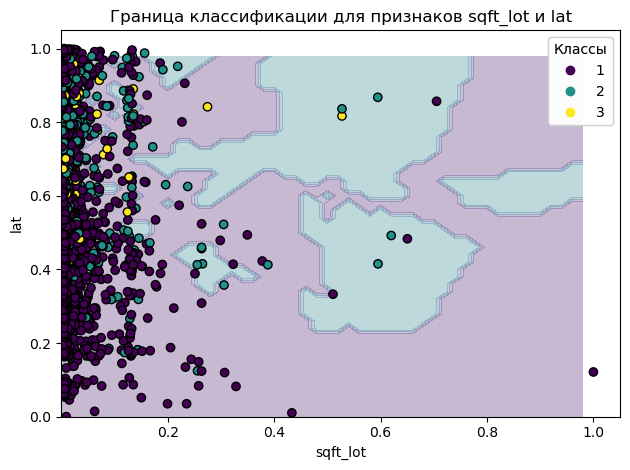

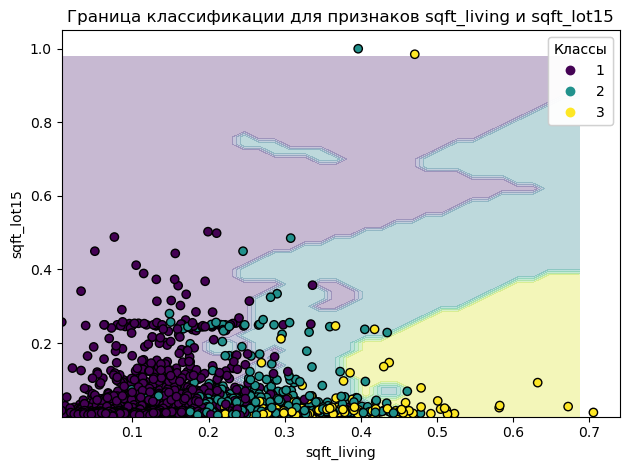

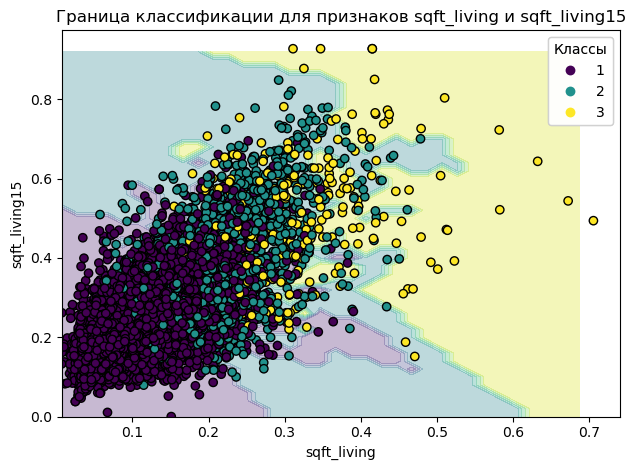

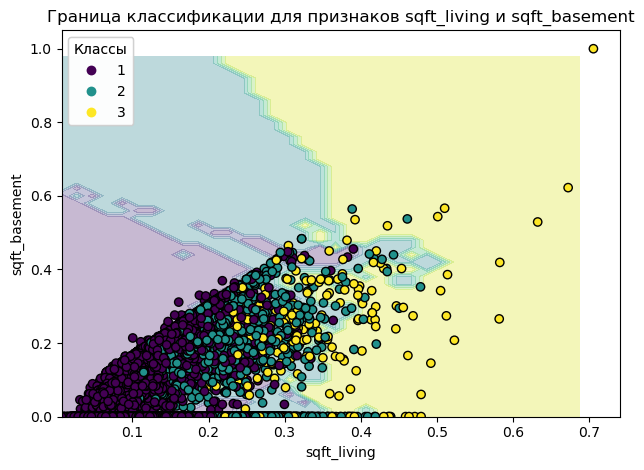

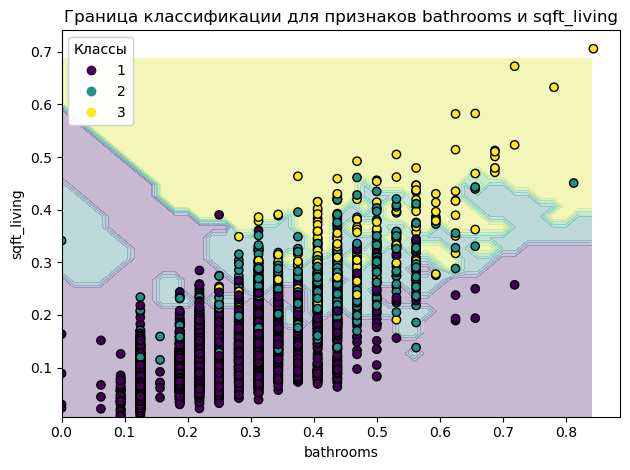

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

h = 0.02         # щаг построения графика
# подготовка модели классификатора (использую только knn):
knn = KNeighborsClassifier()


# перебираем все упорядоченные пары индексов признаков для построения графика границ классификацц для каждого из них:
for i, j in ((4, 15), (3, 18), (3, 17), (3, 11), (2, 3)):
    # определение минимального и максимальных границ графика
    x_min, x_max = df_train.iloc[:, i].min(), df_train.iloc[:, i].max()
    y_min, y_max = df_train.iloc[:, j].min(), df_train.iloc[:, j].max()

    # создание сетки значений для построения графика
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # предсказание классов точек из сетки значений
    knn.fit(df_train.iloc[:,[i, j]], y_train)
    Z = knn.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = df_train.iloc[:,[i, j]].columns))
    Z = Z.reshape(xx.shape)

    # Добавление подписей
    plt.xlabel(df_train[df_train.columns[i]].name)
    plt.ylabel(df_train[df_train.columns[j]].name)
    plt.title(f"Граница классификации для признаков {df_train[df_train.columns[i]].name} и {df_train[df_train.columns[j]].name}")

    # добавляем данные в график
    plt.contourf(xx, yy, Z, alpha = 0.3)

    # Добавляем легенду на график
    scatter = plt.scatter(df_train.iloc[:, i], df_train.iloc[:, j], c = y_train, edgecolor = 'k')
    legend1 = plt.legend(*scatter.legend_elements(), title="Классы")
    plt.gca().add_artist(legend1) 

    plt.tight_layout()  # Для компактного расположения графиков
    plt.show()          # показываем график



## 7. Заключение

    Различные методы классификации обладают целым рядом особенностей связанных не только с принципами работы, но и выбором различных значений параметров. Каждый из них могут показывать различные результаты в зависимости от данных к которым они применяются. Проанализировав методы классификации которые были использованы в данной работе пришел к выводу что лучшими являются: метод опорных векторов и градиентный бустинг.

**1. Метод k-ближайших соседей (kNN)**

Особенности: Классифицирует объект по ближайшим k соседям в пространстве признаков.

Плюсы: Прост в реализации, не требует обучения, хорошо работает с небольшими датасетами.

Минусы: Медленный на больших данных, чувствителен к шуму и выбору k.

**2. Логистическая регрессия**

Особенности: Линейный классификатор, предсказывает вероятность принадлежности к классу.

Плюсы: Легко интерпретируется, устойчив к выбросам, быстро работает на больших данных.

Минусы: Плохо работает с нелинейными зависимостями.

**3. Метод опорных векторов (SVM)**

Особенности: Ищет оптимальную гиперплоскость для разделения классов, может использовать ядра для работы с нелинейными данными.

Плюсы: Хорошо работает при небольших выборках, справляется с нелинейными зависимостями.

Минусы: Долгое обучение на больших данных, чувствителен к выбору гиперпараметров.

**4. Деревья решений (Decision Trees)**

Особенности: Разбивает данные на основе условий, формируя иерархическую структуру решений.

Плюсы: Простота интерпретации, быстрое обучение.

Минусы: Склонность к переобучению, нестабильность к небольшим изменениям в данных.

**5. Случайный лес (Random Forest)**

Особенности: Использует ансамбль деревьев решений, комбинируя их результаты для улучшения точности.

Плюсы: Высокая точность, устойчивая работа с шумными данными, снижает риск переобучения.

Минусы: Более медленный в сравнении с одиночными деревьями, сложнее интерпретировать.

**6. Градиентный бустинг (Gradient Boosting)**

Особенности: Строит последовательность слабых моделей (обычно деревьев решений), улучшая предсказания на каждом шаге.

Плюсы: Высокая точность, хорошо работает с разреженными данными.

Минусы: Долгое обучение, чувствительность к шуму и выбору гиперпараметров.